In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
shampoo=pd.read_csv('shampoo.csv')

In [3]:
shampoo.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
type(shampoo)

pandas.core.frame.DataFrame

In [5]:
shampoo=pd.read_csv("shampoo.csv", index_col=[0], parse_dates=True, squeeze=True)

In [6]:
type(shampoo)

pandas.core.series.Series

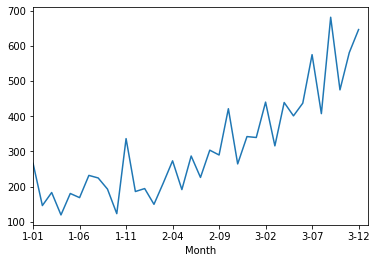

In [7]:
shampoo.plot()

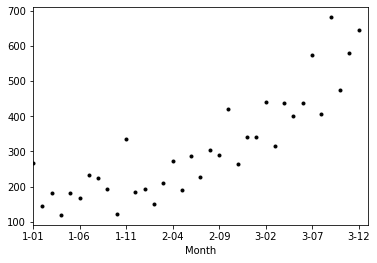

In [8]:
shampoo.plot(style='k.')

In [9]:
shampoo.size

37

In [10]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [11]:
shampoo_ma=shampoo.rolling(window=10).mean()

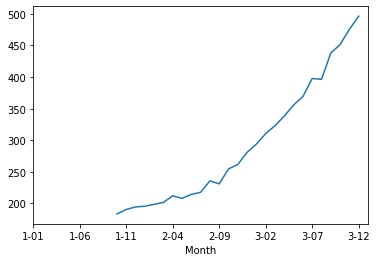

In [12]:
shampoo_ma.plot()

In [13]:
shampoo_base=pd.concat([shampoo, shampoo.shift(1)], axis=1)

In [14]:
shampoo_base

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [15]:
shampoo_base.columns=['Actual_Sale', 'Forecost_Sale']

In [16]:
shampoo_base.head()

,Actual_Sale,Forecost_Sale
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [17]:
shampoo_base.dropna(inplace=True)

In [18]:
shampoo_base.head()

,Actual_Sale,Forecost_Sale
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
shampoo_error=mean_squared_error(shampoo_base.Actual_Sale, shampoo_base.Forecost_Sale)

In [21]:
shampoo_error

11715.388285714285

In [22]:
np.sqrt(shampoo_error)

108.23764726616282

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

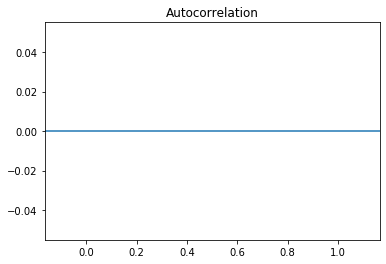

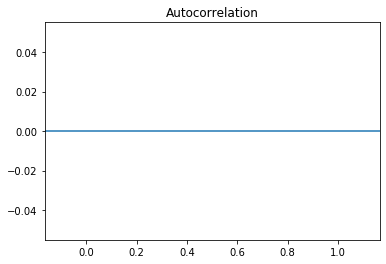

In [24]:
plot_acf(shampoo)

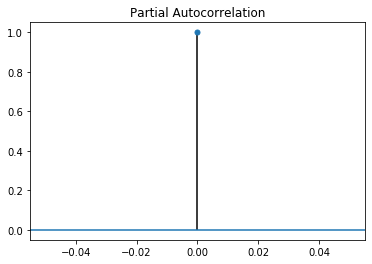

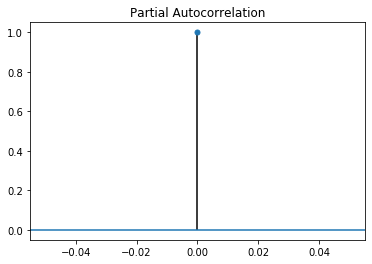

In [27]:
plot_pacf(shampoo)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
shampoo_train=shampoo[0:25]
shampoo_test=shampoo[25:36]

In [37]:
shampoo_model=ARIMA(shampoo_train, order=(3,1,2))

C:\Users\zubai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\zubai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [38]:
shampoo_model_fit=shampoo_model.fit()

In [39]:
shampoo_model_fit.aic

272.38919480714185

In [40]:
shampoo_forecast=shampoo_model_fit.forecast(steps=11)[0]

In [41]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.92698461703426

In [56]:
p_values=range(0,5)
q_values=range(0,3)
d_values=range(0,5)

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
for p in p_values:
    for q in q_values:
        for d in d_values:
            order=(p,q,d)
            train,test=shampoo[0:25], shampoo[25:36]
            prediction=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train, order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test, predictions)
                    print("ARIMA%:MSE=%.2f" %(order,error))
                except:
                    continue 